In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def convert_to_data(raw_data):
  true_cols_names = []
  for col_first_name in [x for x in raw_data.values[0] if type(x) != float][1:]:
    if col_first_name == 'Структура численности постоянного населения на начало года (на 1 января) по возрастным группам, %':
      for procent in [x for x in raw_data.values[1] if type(x) != float]:
        for year in [2019,2020,2021,2022]:
          true_cols_names += [f'{col_first_name}/{procent}/{year}']
    else:
      for year in [2019,2020,2021,2022]:
        true_cols_names += [f'{col_first_name}/{year}']

  df = pd.DataFrame()
  df['Регион'] = raw_data.T.values[0,3:]
  for i,col in enumerate(true_cols_names):
    df[col] = raw_data.T.values[i+1,3:]
  return df

In [ ]:
class CFG:
  DROP_REGS = ['Российская Федерация',
             'Центральный федеральный округ',
             'Северо-Западный федеральный округ',
             'Южный федеральный округ',
             'Северо-Кавказский федеральный округ',
             'Приволжский федеральный округ',
             'Уральский федеральный округ',
             'Сибирский федеральный округ',
             'Дальневосточный федеральный округ',
             #'Ненецкий автономный округ', # нет данных по образованию
             #'Ямало-Ненецкий автономный округ', # нет данных по образованию
             #'Чукотский автономный округ'
             ]
  FEDERAL = ['Центральный федеральный округ',
             'Северо-Западный федеральный округ',
             'Южный федеральный округ',
             'Северо-Кавказский федеральный округ',
             'Приволжский федеральный округ',
             'Уральский федеральный округ',
             'Сибирский федеральный округ',
             'Дальневосточный федеральный округ',]

  S_FEDERAL = ['Центральный',
             'Северо-Западный',
             'Южный',
             'Северо-Кавказский',
             'Приволжский',
             'Уральский',
             'Сибирский',
             'Дальневосточный',]

In [ ]:
data = convert_to_data(pd.read_excel('./mosturism_dataset.xlsx'))

<ipython-input-2-636c8d2aaaba>:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col] = raw_data.T.values[i+1,3:]
<ipython-input-2-636c8d2aaaba>:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[col] = raw_data.T.values[i+1,3:]
<ipython-input-2-636c8d2aaaba>:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = fr

In [ ]:
def search_okrug(idx):
  if idx >= 0 and idx <= 19:
    return 'Центральный федеральный округ'
  if idx >= 20 and idx <= 31:
    return 'Северо-Западный федеральный округ'
  if idx >= 32 and idx <= 40:
    return 'Южный федеральный округ'
  if idx >= 41 and idx <= 48:
    return 'Северо-Кавказский федеральный округ'
  if idx >= 49 and idx <= 63:
    return 'Приволжский федеральный округ'
  if idx >= 64 and idx <= 70:
    return 'Уральский федеральный округ'
  if idx >= 71 and idx <= 81:
    return "Сибирский федеральный округ"
  if idx >= 82:
    return 'Дальневосточный федеральный округ'
  return 'NuN'

data['Округ'] = data.index.map(search_okrug)

<ipython-input-5-107ef858035a>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['Округ'] = data.index.map(search_okrug)


In [ ]:
data

,Регион,"Число коллективных средств размещения (КСР), ед./2019","Число коллективных средств размещения (КСР), ед./2020","Число коллективных средств размещения (КСР), ед./2021","Число коллективных средств размещения (КСР), ед./2022","Число номеров в КСР, ед./2019","Число номеров в КСР, ед./2020","Число номеров в КСР, ед./2021","Число номеров в КСР, ед./2022","Численность размещенных лиц в КСР, чел./2019",...,"Количество эксплуатационных автобусов общего пользования на 100 000 человек населения, ед./2022","Принято на обучение по программам бакалавриата, специалитета, магистратуры, тыс. чел./2019","Принято на обучение по программам бакалавриата, специалитета, магистратуры, тыс. чел./2020","Принято на обучение по программам бакалавриата, специалитета, магистратуры, тыс. чел./2021","Принято на обучение по программам бакалавриата, специалитета, магистратуры, тыс. чел./2022","Средняя цена 1 кв.м. общей площади квартир на рынке жилья, руб./2019","Средняя цена 1 кв.м. общей площади квартир на рынке жилья, руб./2020","Средняя цена 1 кв.м. общей площади квартир на рынке жилья, руб./2021","Средняя цена 1 кв.м. общей площади квартир на рынке жилья, руб./2022",Округ
0,Российская Федерация,28302,615.0,28979.0,29547.0,992601,977409.0,1027010.0,1058709.0,70557497,...,94.14027,"1 129,4","1 093,3","1 129,1",нет данных,нет данных,нет данных,72131.7825,92190.04,Центральный федеральный округ
1,Центральный федеральный округ,4921,4617.0,4981.0,5236.0,223715,211902.0,228258.0,236970.0,22789055,...,95.518776,365.8,365.3,379.2,нет данных,нет данных,нет данных,92160.8425,116395.9125,Центральный федеральный округ
2,Белгородская область,185,186.0,182.0,184.0,5120,5207.0,5177.0,5219.0,305595,...,92.438101,12.2,12,13.7,нет данных,нет данных,нет данных,57480.935,81406.6,Центральный федеральный округ
3,Брянская область,124,134.0,141.0,146.0,3572,3571.0,3773.0,4067.0,260273,...,121.214225,5.8,5.7,5.7,нет данных,нет данных,нет данных,38536.9425,56859.0625,Центральный федеральный округ
4,Владимирская область,246,246.0,247.0,261.0,7282,7513.0,7694.0,8065.0,641046,...,73.632036,8,7,7.1,нет данных,нет данных,нет данных,56314.1775,72216.005,Центральный федеральный округ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,Амурская область,172,184.0,192.0,194.0,3869,4099.0,4193.0,4266.0,311171,...,100.238297,4.1,3.5,3.9,нет данных,нет данных,нет данных,97772.4025,110080.3025,Дальневосточный федеральный округ
90,Магаданская область,30,26.0,29.0,28.0,951,787.0,838.0,836.0,56731,...,97.531921,0.7,0.5,0.6,нет данных,нет данных,нет данных,65807.335,87125.165,Дальневосточный федеральный округ
91,Сахалинская область,118,114.0,108.0,110.0,2775,2787.0,2840.0,2855.0,206418,...,139.403086,1.4,1.2,1.2,нет данных,нет данных,нет данных,125917.0975,137528.6875,Дальневосточный федеральный округ
92,Еврейская автономная область,29,30.0,28.0,30.0,827,838.0,769.0,769.0,41232,...,86.804378,0.5,0.4,0.5,нет данных,нет данных,нет данных,47739.67,57329.715,Дальневосточный федеральный округ


In [ ]:
drop_idx = [data['Регион'].tolist().index(x) for x in CFG.DROP_REGS]
data_dp = data.drop(drop_idx,axis=0).reset_index(drop=True)

In [ ]:
data.sample(20)

,Регион,"Число коллективных средств размещения (КСР), ед./2019","Число коллективных средств размещения (КСР), ед./2020","Число коллективных средств размещения (КСР), ед./2021","Число коллективных средств размещения (КСР), ед./2022","Число номеров в КСР, ед./2019","Число номеров в КСР, ед./2020","Число номеров в КСР, ед./2021","Число номеров в КСР, ед./2022","Численность размещенных лиц в КСР, чел./2019",...,"Количество эксплуатационных автобусов общего пользования на 100 000 человек населения, ед./2022","Принято на обучение по программам бакалавриата, специалитета, магистратуры, тыс. чел./2019","Принято на обучение по программам бакалавриата, специалитета, магистратуры, тыс. чел./2020","Принято на обучение по программам бакалавриата, специалитета, магистратуры, тыс. чел./2021","Принято на обучение по программам бакалавриата, специалитета, магистратуры, тыс. чел./2022","Средняя цена 1 кв.м. общей площади квартир на рынке жилья, руб./2019","Средняя цена 1 кв.м. общей площади квартир на рынке жилья, руб./2020","Средняя цена 1 кв.м. общей площади квартир на рынке жилья, руб./2021","Средняя цена 1 кв.м. общей площади квартир на рынке жилья, руб./2022",Округ
71,Сибирский федеральный округ,2793,2806.0,3021.0,3143.0,77795,78224.0,83068.0,85409.0,5218899,...,99.526595,130.9,127.4,133,нет данных,нет данных,нет данных,62439.7825,79807.6075,Сибирский федеральный округ
19,г. Москва,1548,1170.0,1250.0,1345.0,89721,77447.0,83460.0,87128.0,11453953,...,71.152885,215,219.8,232.2,нет данных,нет данных,нет данных,233893.89,290535.135,Центральный федеральный округ
0,Российская Федерация,28302,615.0,28979.0,29547.0,992601,977409.0,1027010.0,1058709.0,70557497,...,94.14027,"1 129,4","1 093,3","1 129,1",нет данных,нет данных,нет данных,72131.7825,92190.04,Центральный федеральный округ
49,Приволжский федеральный округ,4157,4169.0,4199.0,4338.0,135672,134015.0,136369.0,141629.0,9065833,...,88.448843,221,209.5,215.3,нет данных,нет данных,нет данных,60673.1925,84336.8825,Приволжский федеральный округ
34,Республика Калмыкия,50,37.0,44.0,47.0,675,586.0,643.0,672.0,43713,...,70.703977,2.2,2,1.9,нет данных,нет данных,нет данных,46617.9625,54925.64,Южный федеральный округ
2,Белгородская область,185,186.0,182.0,184.0,5120,5207.0,5177.0,5219.0,305595,...,92.438101,12.2,12,13.7,нет данных,нет данных,нет данных,57480.935,81406.6,Центральный федеральный округ
29,Новгородская область,134,143.0,135.0,147.0,4088,4217.0,4258.0,4515.0,327026,...,100.186482,2.4,2.4,2.3,нет данных,нет данных,нет данных,45375.76,56351.525,Северо-Западный федеральный округ
35,Республика Крым,1320,1490.0,1630.0,1610.0,69458,73307.0,75248.0,74329.0,2175665,...,117.226322,9.1,8.8,9.1,нет данных,нет данных,нет данных,75210.755,107520.3525,Южный федеральный округ
17,Тульская область,186,186.0,192.0,207.0,6289,6413.0,6437.0,7052.0,472160,...,131.355929,9.8,10.1,9.3,нет данных,нет данных,нет данных,73986.435,81644.465,Центральный федеральный округ
83,Республика Бурятия,385,365.0,457.0,457.0,6729,6564.0,7906.0,8156.0,405981,...,131.33216,5.5,5.5,5.3,нет данных,нет данных,нет данных,71719.5375,83232.08,Дальневосточный федеральный округ


## Okrug EDA

Text(0.5, 1.0, 'Зарплаты по округам')

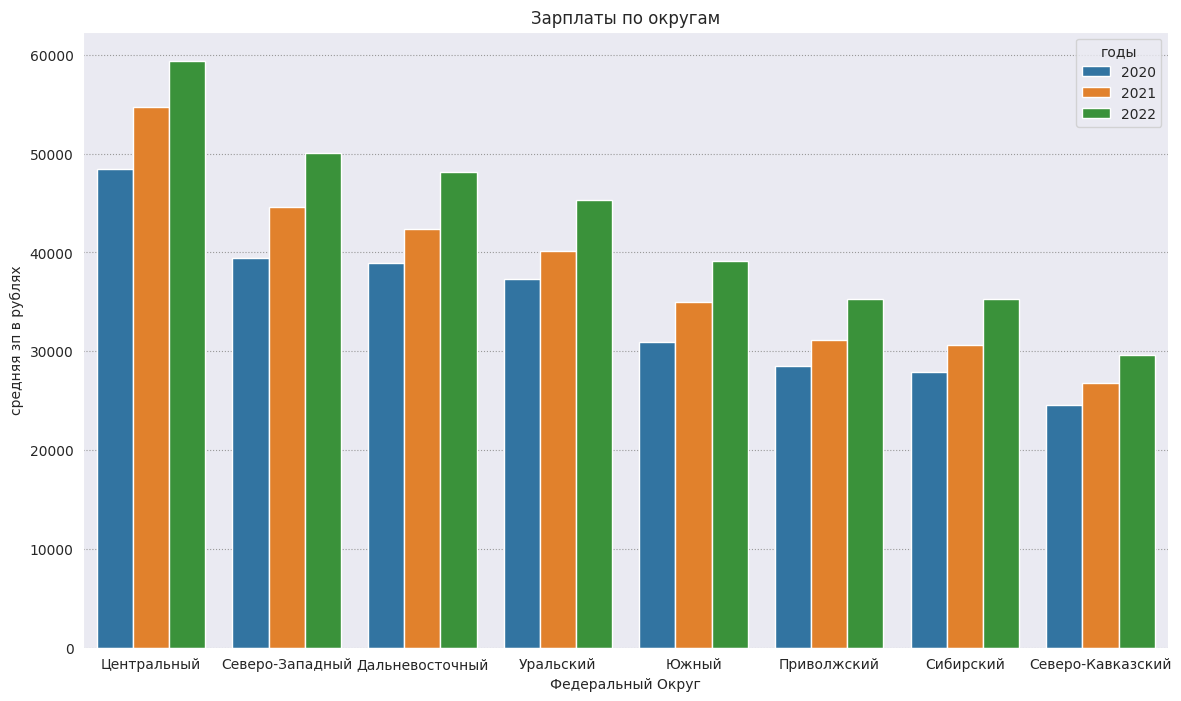

In [ ]:
target_col = 'Среднедушевые денежные доходы населения, руб.'
years = [2020,2021,2022]

source = data[[reg in CFG.FEDERAL for reg in data['Регион']]][[f'{target_col}/{i}' for i in years]]
source.columns = years
source['Федеральный Округ'] = CFG.S_FEDERAL
source = source.sort_values(by=2022)[::-1]
source = pd.melt(source,id_vars=['Федеральный Округ'],value_vars=years,var_name='годы',value_name='средняя зп в рублях')

sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
plt.figure(figsize=(14,8))
sns.barplot(source,x='Федеральный Округ',y='средняя зп в рублях',hue='годы')
plt.title('Зарплаты по округам')

Text(0.5, 1.0, 'Зарплаты по округам без МСК и СПб')

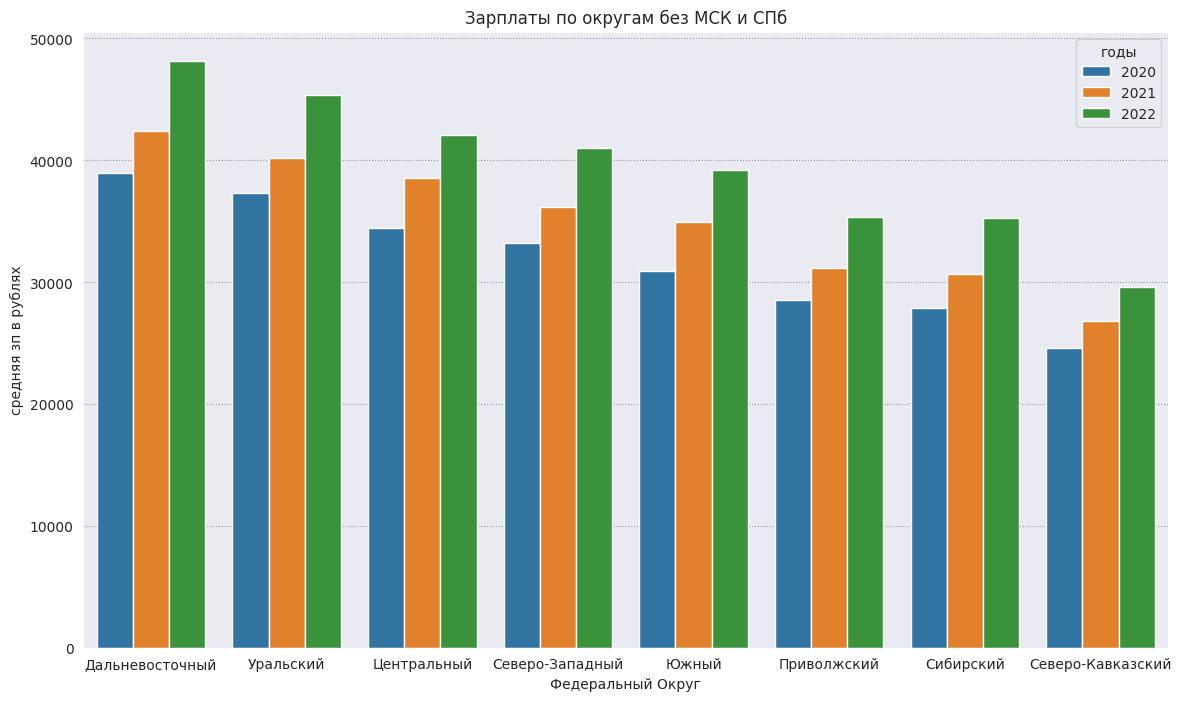

In [ ]:
target_col = 'Среднедушевые денежные доходы населения, руб.'
weight_col = 'Численность постоянного населения в среднем за год, чел.'
years = [2020,2021,2022]

cols = [f'{target_col}/{y}' for y in years] + [f'{weight_col}/{y}' for y in years] + ['Округ']
source = data_dp[(data_dp['Регион'] != 'г. Москва') & (data_dp['Регион'] != 'г. Санкт-Петербург')][cols].groupby('Округ').agg(lambda x:x)
for y in years:
  source[f'{target_col}/{y}'] = source.apply(lambda x: np.average(x[f'{target_col}/{y}'],weights=x[f'{weight_col}/{y}']),axis=1)
  source = source.drop([f'{weight_col}/{y}'],axis=1)
source.columns = years
source['Федеральный Округ'] = source.index.map(lambda x:x.split()[0])
source.reset_index(drop=True)
source = source.sort_values(by=2022)[::-1]
source = pd.melt(source,id_vars=['Федеральный Округ'],value_vars=years,var_name='годы',value_name='средняя зп в рублях')

sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
plt.figure(figsize=(14,8))
sns.barplot(source,x='Федеральный Округ',y='средняя зп в рублях',hue='годы')
plt.title('Зарплаты по округам без МСК и СПб')

Text(0.5, 1.0, 'Уровени безработицы по округам')

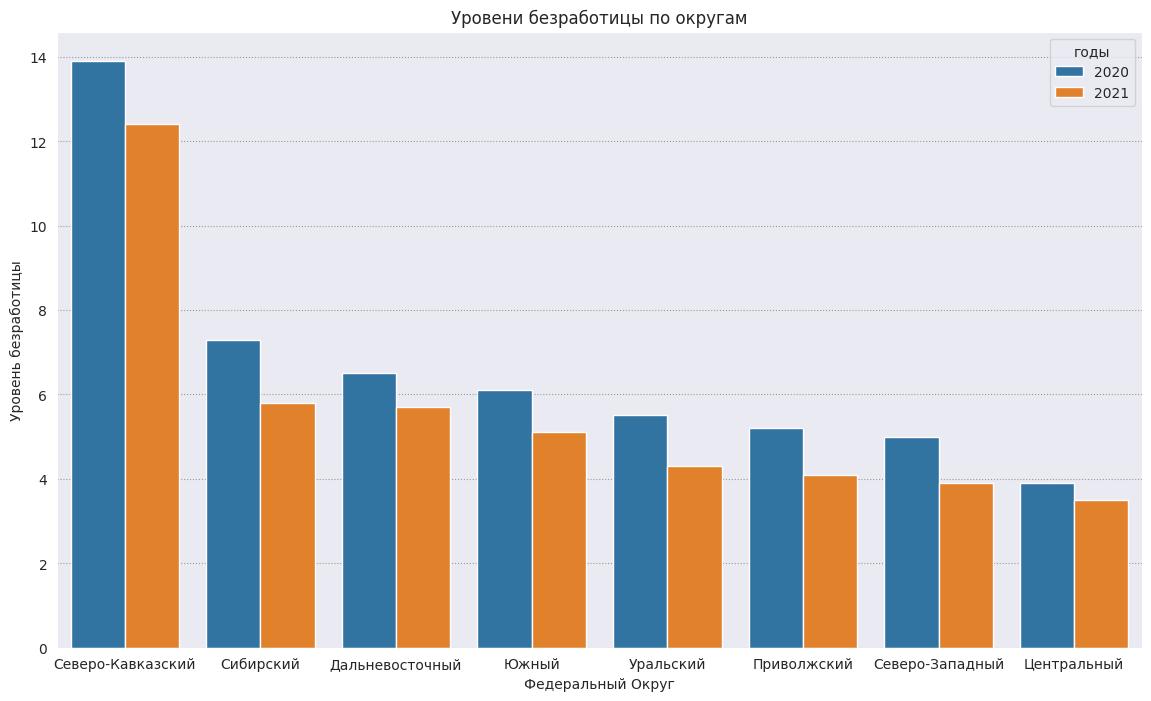

In [ ]:
target_col = 'Уровень безработицы населения в возрасте 15-72 лет, %'
years = [2020,2021]

source = data[[reg in CFG.FEDERAL for reg in data['Регион']]][[f'{target_col}/{i}' for i in years]]
source.columns = years
source['Федеральный Округ'] = CFG.S_FEDERAL
source = source.sort_values(by=2021)[::-1]
source = pd.melt(source,id_vars=['Федеральный Округ'],value_vars=years,var_name='годы',value_name='Уровень безработицы')

sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
plt.figure(figsize=(14,8))
sns.barplot(source,x='Федеральный Округ',y='Уровень безработицы',hue='годы')
plt.title('Уровени безработицы по округам')

Text(0.5, 1.0, 'Уровень безработицы без МСК и СПб')

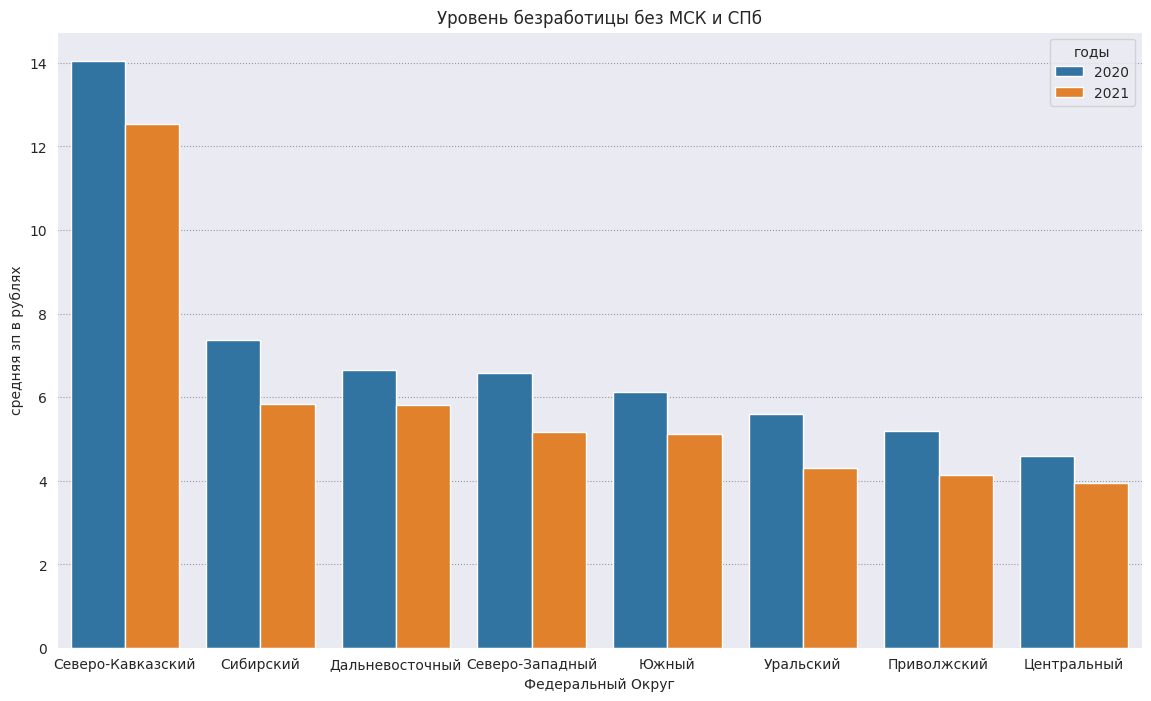

In [ ]:
target_col = 'Уровень безработицы населения в возрасте 15-72 лет, %'
weight_col = 'Численность постоянного населения в среднем за год, чел.'
years = [2020,2021]

cols = [f'{target_col}/{y}' for y in years] + [f'{weight_col}/{y}' for y in years] + ['Округ']
source = data_dp[(data_dp['Регион'] != 'г. Москва') & (data_dp['Регион'] != 'г. Санкт-Петербург')][cols].groupby('Округ').agg(lambda x:x)
for y in years:
  source[f'{target_col}/{y}'] = source.apply(lambda x: np.average(x[f'{target_col}/{y}'],weights=x[f'{weight_col}/{y}']),axis=1)
  source = source.drop([f'{weight_col}/{y}'],axis=1)
source.columns = years
source['Федеральный Округ'] = source.index.map(lambda x:x.split()[0])
source.reset_index(drop=True)
source = source.sort_values(by=2021)[::-1]
source = pd.melt(source,id_vars=['Федеральный Округ'],value_vars=years,var_name='годы',value_name='средняя зп в рублях')

sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
plt.figure(figsize=(14,8))
sns.barplot(source,x='Федеральный Округ',y='средняя зп в рублях',hue='годы')
plt.title('Уровень безработицы без МСК и СПб')

Text(0.5, 1.0, 'Доля городского населения по регионам')

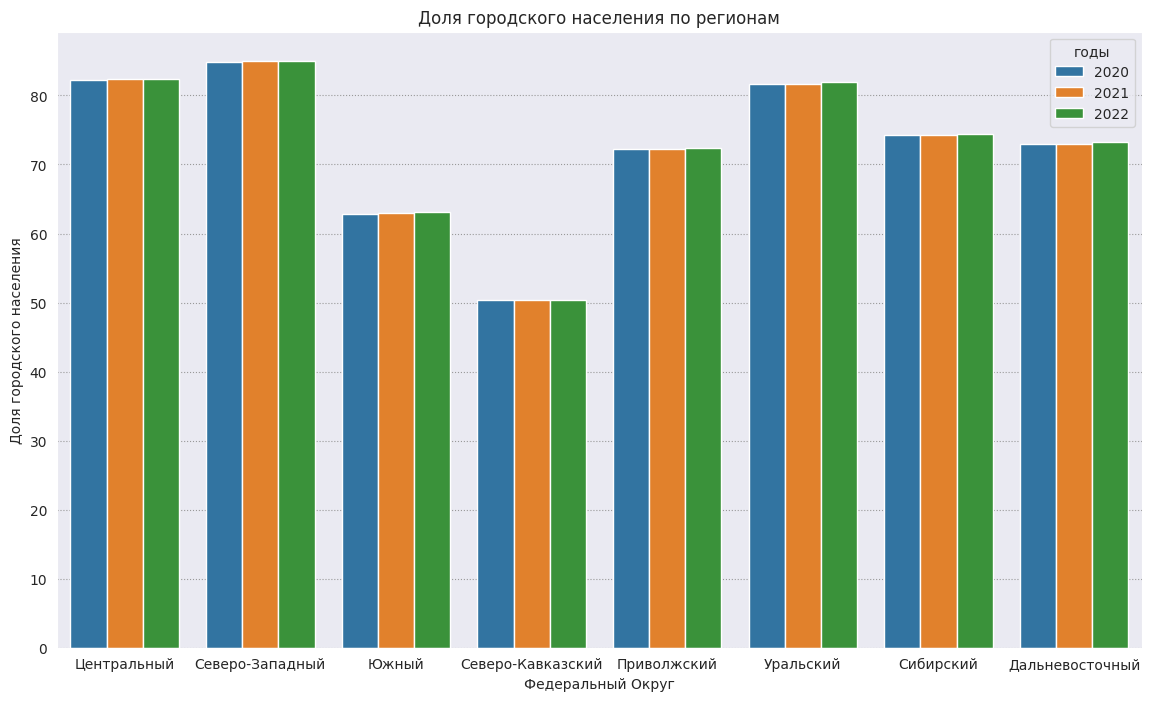

In [ ]:
target_col = 'Доля городского населения в общей численности населения на 1 января, %'
years = [2020,2021,2022]

source = data[[reg in CFG.FEDERAL for reg in data['Регион']]][[f'{target_col}/{i}' for i in years]]
source.columns = years
source['Федеральный Округ'] = CFG.S_FEDERAL
source = pd.melt(source,id_vars=['Федеральный Округ'],value_vars=years,var_name='годы',value_name='Доля городского населения')

sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
plt.figure(figsize=(14,8))
sns.barplot(source,x='Федеральный Округ',y='Доля городского населения',hue='годы')
plt.title('Доля городского населения по регионам')

Text(0.5, 1.0, 'Количество преступлений на человека по регионам')

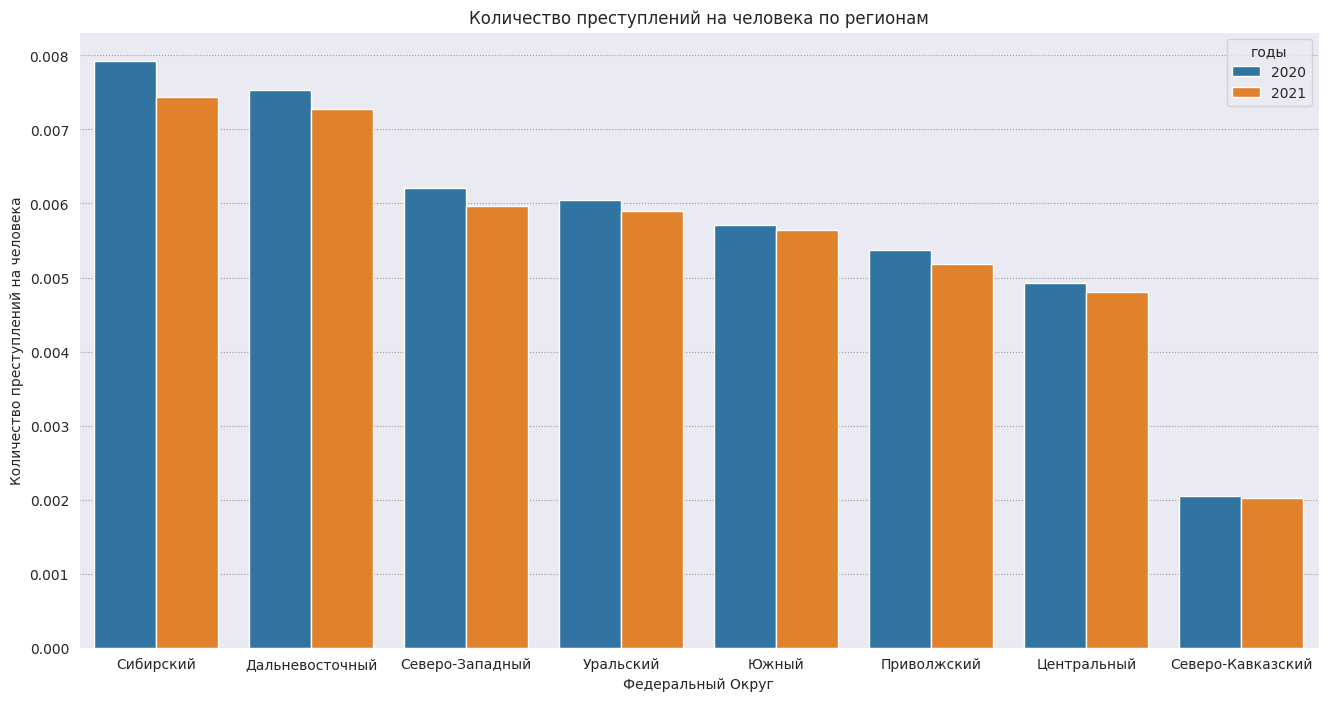

In [ ]:
target_col = 'Количество преступлений, зарегистрированных в отчетном периоде, ед.'
years = [2020,2021]

for y in years:
  data[f'{target_col}_на_человека/{y}'] = data[f'{target_col}/{y}'].astype(float).values /  data[f'Численность постоянного населения в среднем за год, чел./{y}'].astype(float).values
target_col += '_на_человека'

source = data[[reg in CFG.FEDERAL for reg in data['Регион']]][[f'{target_col}/{i}' for i in years]]
source.columns = years
source['Федеральный Округ'] = CFG.S_FEDERAL
source = source.sort_values(by=2021)[::-1]
source = pd.melt(source,id_vars=['Федеральный Округ'],value_vars=years,var_name='годы',value_name='Количество преступлений на человека')

sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
plt.figure(figsize=(16,8))
sns.barplot(source,x='Федеральный Округ',y='Количество преступлений на человека',hue='годы')
plt.title('Количество преступлений на человека по регионам')

In [ ]:
for y in [2020,2021,2022]:
  data_dp[f'Число лиц КСР / Число ночевок в КСР/{y}'] = (data_dp[f'Численность размещенных лиц в КСР, чел./{y}'] / data_dp[f'Число ночевок в КСР, ед./{y}']).astype(float).values

for y in [2020,2021,2022]:
  data_dp[f'Число лиц КСР / Число номеров КСР/{y}'] = (data_dp[f'Численность размещенных лиц в КСР, чел./{y}'] / data_dp[f'Число номеров в КСР, ед./{y}']).astype(float).values

for y in [2020,2021,2022]:
  data_dp[f'Число лиц КСР / Население/{y}'] = (data_dp[f'Численность размещенных лиц в КСР, чел./{y}'] / data_dp[f'Численность постоянного населения в среднем за год, чел./{y}']).astype(float).values

Text(0.5, 1.0, 'Задерживаемость по регионам')

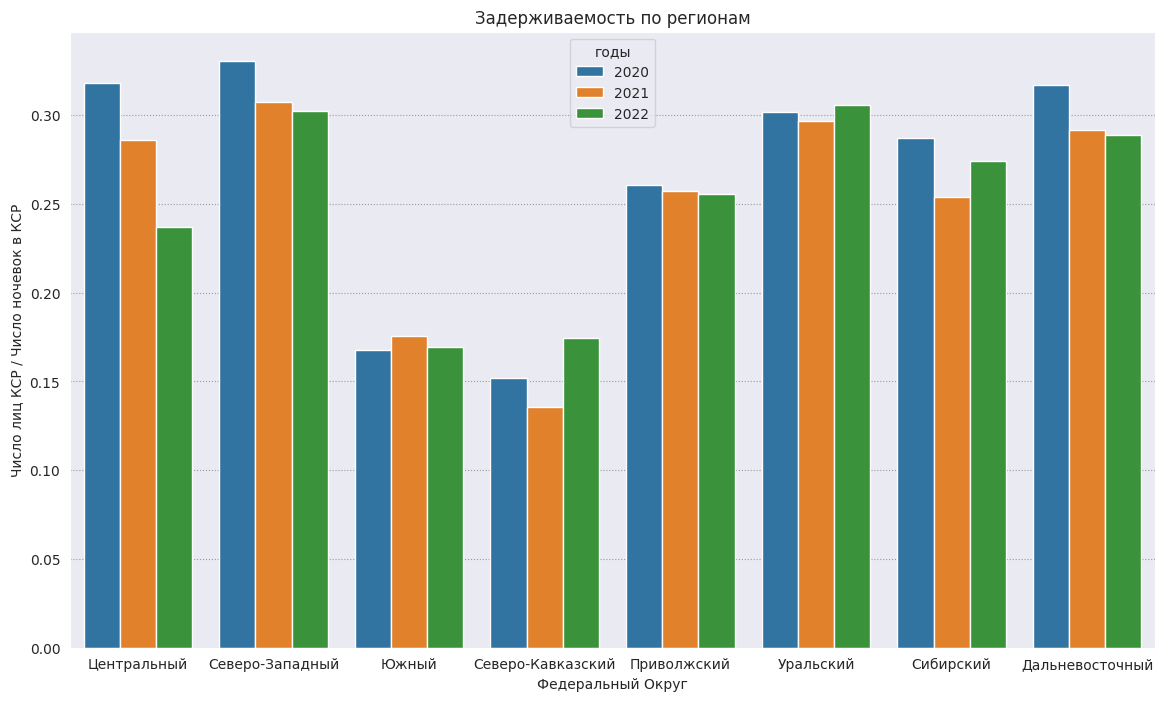

In [ ]:
target_col = 'Число лиц КСР / Число ночевок в КСР'
years = [2020,2021,2022]

source = data[[reg in CFG.FEDERAL for reg in data['Регион']]][[f'{target_col}/{i}' for i in years]]
source.columns = years
source['Федеральный Округ'] = CFG.S_FEDERAL
source = pd.melt(source,id_vars=['Федеральный Округ'],value_vars=years,var_name='годы',value_name='Число лиц КСР / Число ночевок в КСР')

sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
plt.figure(figsize=(14,8))
sns.barplot(source,x='Федеральный Округ',y='Число лиц КСР / Число ночевок в КСР',hue='годы')
plt.title('Задерживаемость по регионам')

Text(0.5, 1.0, 'Относительное число лиц КСР по регионам')

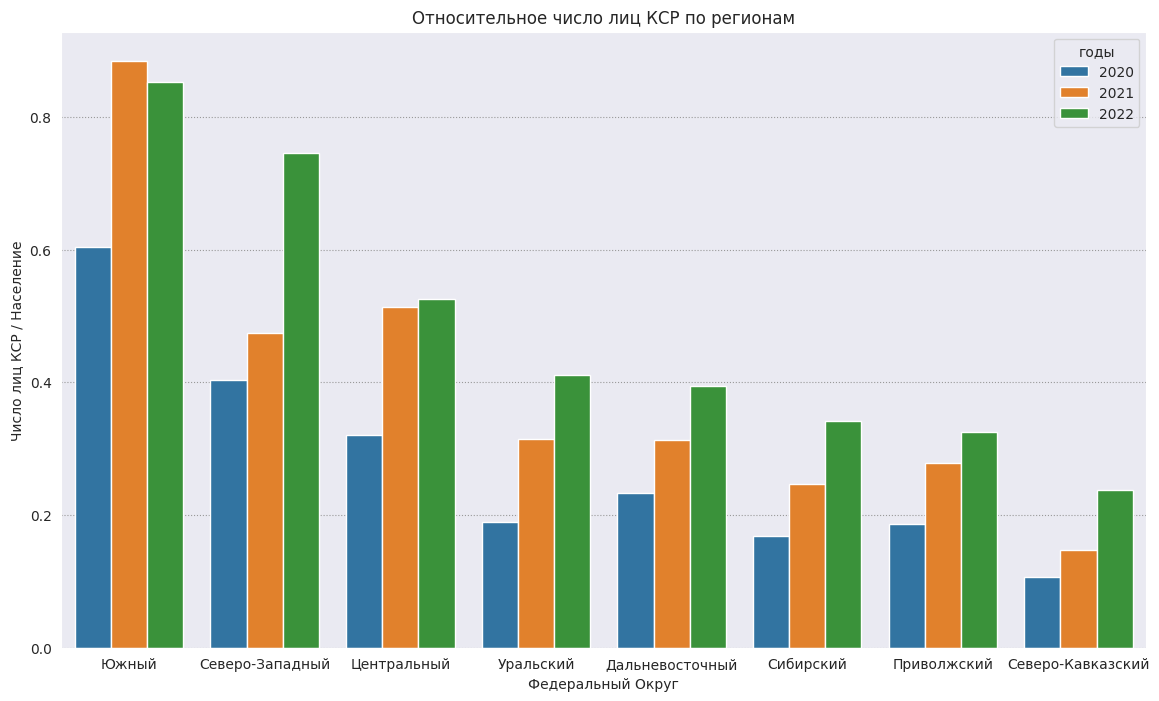

In [ ]:
target_col = 'Число лиц КСР / Население'
years = [2020,2021,2022]

source = data[[reg in CFG.FEDERAL for reg in data['Регион']]][[f'{target_col}/{i}' for i in years]]
source.columns = years
source['Федеральный Округ'] = CFG.S_FEDERAL
source = source.sort_values(by=2022)[::-1]
source = pd.melt(source,id_vars=['Федеральный Округ'],value_vars=years,var_name='годы',value_name=target_col)

sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
plt.figure(figsize=(14,8))
sns.barplot(source,x='Федеральный Округ',y=target_col,hue='годы')
plt.title('Относительное число лиц КСР по регионам')

Text(0.5, 1.0, 'Относительное число лиц КСР по регионам без МСК и СПб')

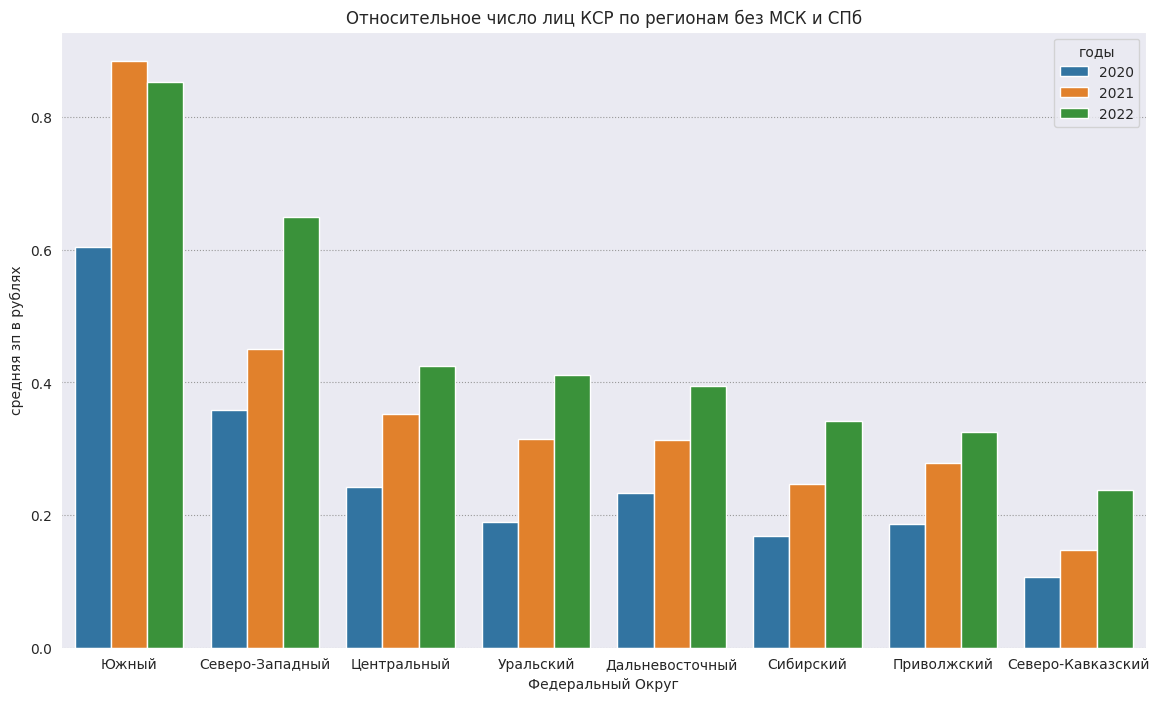

In [ ]:
target_col = 'Число лиц КСР / Население'
weight_col = 'Численность постоянного населения в среднем за год, чел.'
years = [2020,2021,2022]

cols = [f'{target_col}/{y}' for y in years] + [f'{weight_col}/{y}' for y in years] + ['Округ']
source = data_dp[(data_dp['Регион'] != 'г. Москва') & (data_dp['Регион'] != 'г. Санкт-Петербург')][cols].groupby('Округ').agg(lambda x:x.tolist())

for y in years:
  source[f'{target_col}/{y}'] = source.apply(lambda x: np.average(x[f'{target_col}/{y}'],weights=x[f'{weight_col}/{y}']),axis=1)
  source = source.drop([f'{weight_col}/{y}'],axis=1)
source.columns = years
source['Федеральный Округ'] = source.index.map(lambda x:x.split()[0])
source.reset_index(drop=True)
source = source.sort_values(by=2022)[::-1]
source = pd.melt(source,id_vars=['Федеральный Округ'],value_vars=years,var_name='годы',value_name='средняя зп в рублях')

sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
plt.figure(figsize=(14,8))
sns.barplot(source,x='Федеральный Округ',y='средняя зп в рублях',hue='годы')
plt.title('Относительное число лиц КСР по регионам без МСК и СПб')

In [ ]:
target_col = 'Число лиц КСР / Население'
weight_col = 'Численность постоянного населения в среднем за год, чел.'
years = [2020,2021,2022]

cols = [f'{target_col}/{y}' for y in years] + [f'{weight_col}/{y}' for y in years] + ['Округ']
source = data_dp[(data_dp['Регион'] != 'г. Москва') & (data_dp['Регион'] != 'г. Санкт-Петербург')][cols].groupby('Округ').agg(lambda x:x)
for y in years:
  source[f'{target_col}/{y}'] = source.apply(lambda x: np.average(x[f'{target_col}/{y}'],weights=x[f'{weight_col}/{y}']),axis=1)
  source = source.drop([f'{weight_col}/{y}'],axis=1)
source.columns = years
source['Федеральный Округ'] = source.index.map(lambda x:x.split()[0])
source.reset_index(drop=True)
source = source.sort_values(by=2021)[::-1]
source = pd.melt(source,id_vars=['Федеральный Округ'],value_vars=years,var_name='годы',value_name='средняя зп в рублях')

sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
plt.figure(figsize=(14,8))
sns.barplot(source,x='Федеральный Округ',y='средняя зп в рублях',hue='годы')
plt.title('Относительное число лиц КСР по округам без МСК и СПб')

KeyError: ignored

In [ ]:
for y in [2020,2021,2022]:
  data[f'Население 15-29 лет/{y}'] = (data[f'Структура численности постоянного населения на начало года (на 1 января) по возрастным группам, %/10-14 лет/{y}'] +\
                              data[f'Структура численности постоянного населения на начало года (на 1 января) по возрастным группам, %/15-19 лет/{y}'] +\
                              data[f'Структура численности постоянного населения на начало года (на 1 января) по возрастным группам, %/20-24 лет/{y}'] +\
                              data[f'Структура численности постоянного населения на начало года (на 1 января) по возрастным группам, %/25-29 лет/{y}']).astype(float).values

  data[f'Население 30-44 лет/{y}'] = (data[f'Структура численности постоянного населения на начало года (на 1 января) по возрастным группам, %/30-34 лет/{y}'] +\
                              data[f'Структура численности постоянного населения на начало года (на 1 января) по возрастным группам, %/35-39 лет/{y}'] +\
                              data[f'Структура численности постоянного населения на начало года (на 1 января) по возрастным группам, %/40-44 лет/{y}']).astype(float).values


Text(0.5, 1.0, 'Население 15-29 лет по регионам')

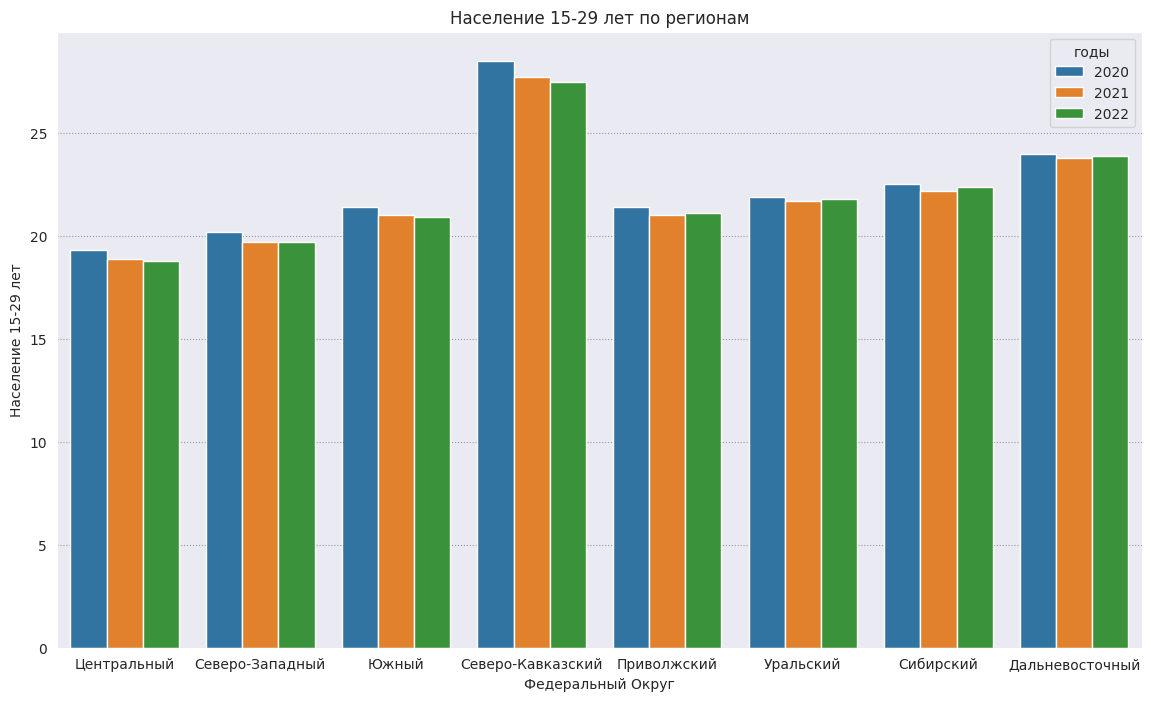

In [ ]:
target_col = 'Население 15-29 лет'
years = [2020,2021,2022]

source = data[[reg in CFG.FEDERAL for reg in data['Регион']]][[f'{target_col}/{i}' for i in years]]
source.columns = years
source['Федеральный Округ'] = CFG.S_FEDERAL
source = pd.melt(source,id_vars=['Федеральный Округ'],value_vars=years,var_name='годы',value_name=target_col)

sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
plt.figure(figsize=(14,8))
sns.barplot(source,x='Федеральный Округ',y=target_col,hue='годы')
plt.title('Население 15-29 лет по регионам')

Text(0.5, 1.0, 'Население 30-44 лет по регионам')

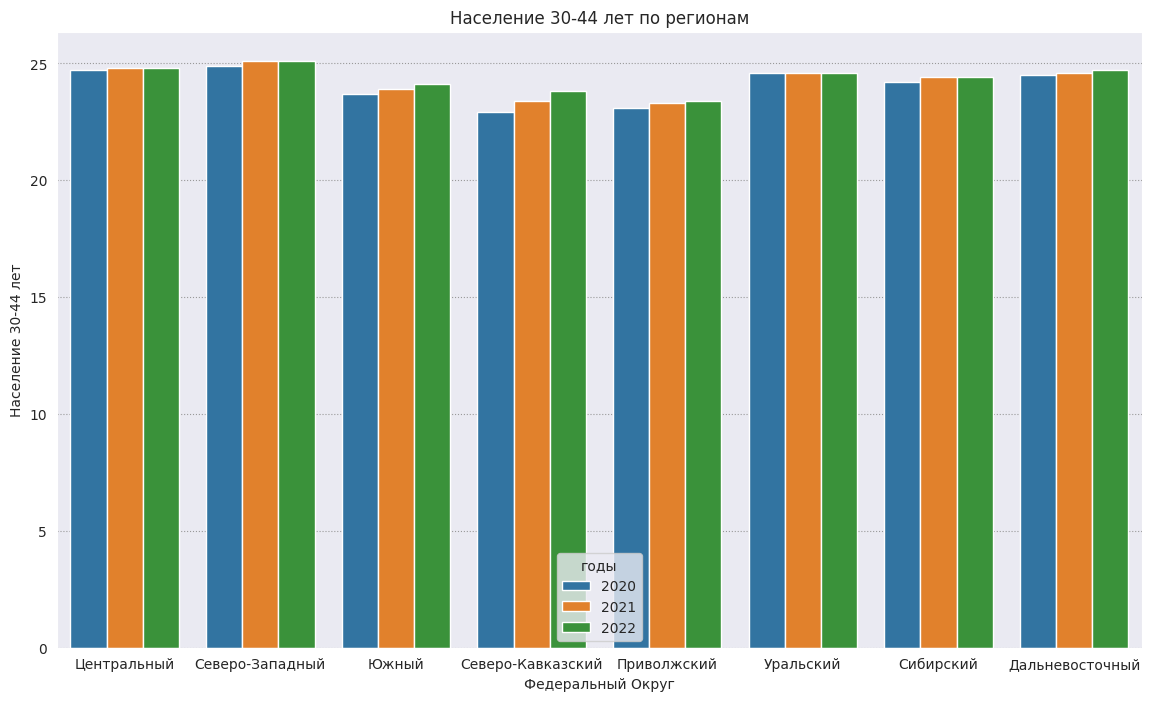

In [ ]:
target_col = 'Население 30-44 лет'
years = [2020,2021,2022]

source = data[[reg in CFG.FEDERAL for reg in data['Регион']]][[f'{target_col}/{i}' for i in years]]
source.columns = years
source['Федеральный Округ'] = CFG.S_FEDERAL
source = pd.melt(source,id_vars=['Федеральный Округ'],value_vars=years,var_name='годы',value_name=target_col)

sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
plt.figure(figsize=(14,8))
sns.barplot(source,x='Федеральный Округ',y=target_col,hue='годы')
plt.title('Население 30-44 лет по регионам')

In [ ]:
for y in [2020,2021,2022]:
  input_people = (data[f'Число прибывших человек - внешняя миграция, чел./{y}'] + data[f'Число прибывших человек - межрегиональная миграция, чел./{y}']).astype(float)
  output_people = (data[f'Число выбывших человек - внешняя миграция, чел./{y}'] + data[f'Число выбывших человек - внутрирегиональная миграция, чел./{y}']).astype(float)
  Q = (input_people + output_people)
  Migration_Saldo = (input_people - output_people)
  data[f'Коэфициент интенсивности миграции/{y}'] = ((Migration_Saldo / data[f'Численность постоянного населения в среднем за год, чел./{y}']).astype(float).values).astype(float) * 1000
  data[f'Коэфициент миграционного оборота/{y}'] = ((Q / data[f'Численность постоянного населения в среднем за год, чел./{y}'].astype(float).values) * 1000).astype(float).values
  data[f'Коэфициент эффективности миграции/{y}'] = ((Migration_Saldo / Q) * 100).astype(float).values


Text(0.5, 1.0, 'Коэфициент интенсивности миграции по регионам')

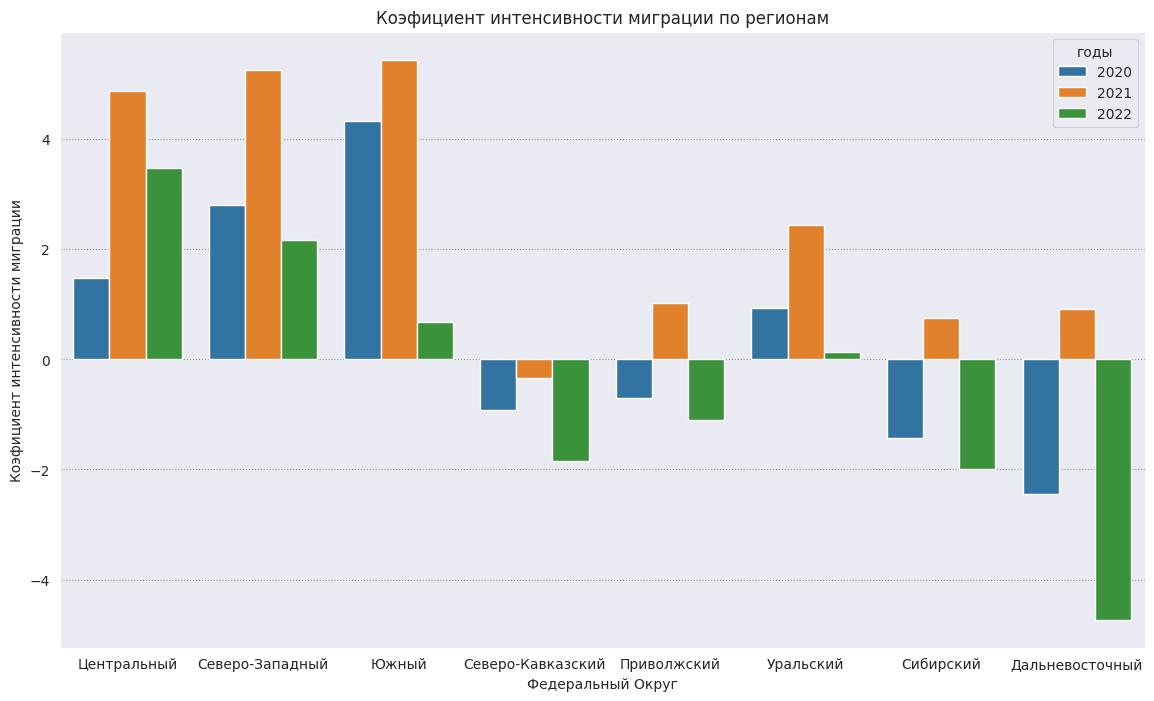

In [ ]:
target_col = 'Коэфициент интенсивности миграции'
years = [2020,2021,2022]

source = data[[reg in CFG.FEDERAL for reg in data['Регион']]][[f'{target_col}/{i}' for i in years]]
source.columns = years
source['Федеральный Округ'] = CFG.S_FEDERAL
source = pd.melt(source,id_vars=['Федеральный Округ'],value_vars=years,var_name='годы',value_name=target_col)

sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
plt.figure(figsize=(14,8))
sns.barplot(source,x='Федеральный Округ',y=target_col,hue='годы')
plt.title('Коэфициент интенсивности миграции по регионам')

Text(0.5, 1.0, 'Коэфициент интенсивности миграции по регионам')

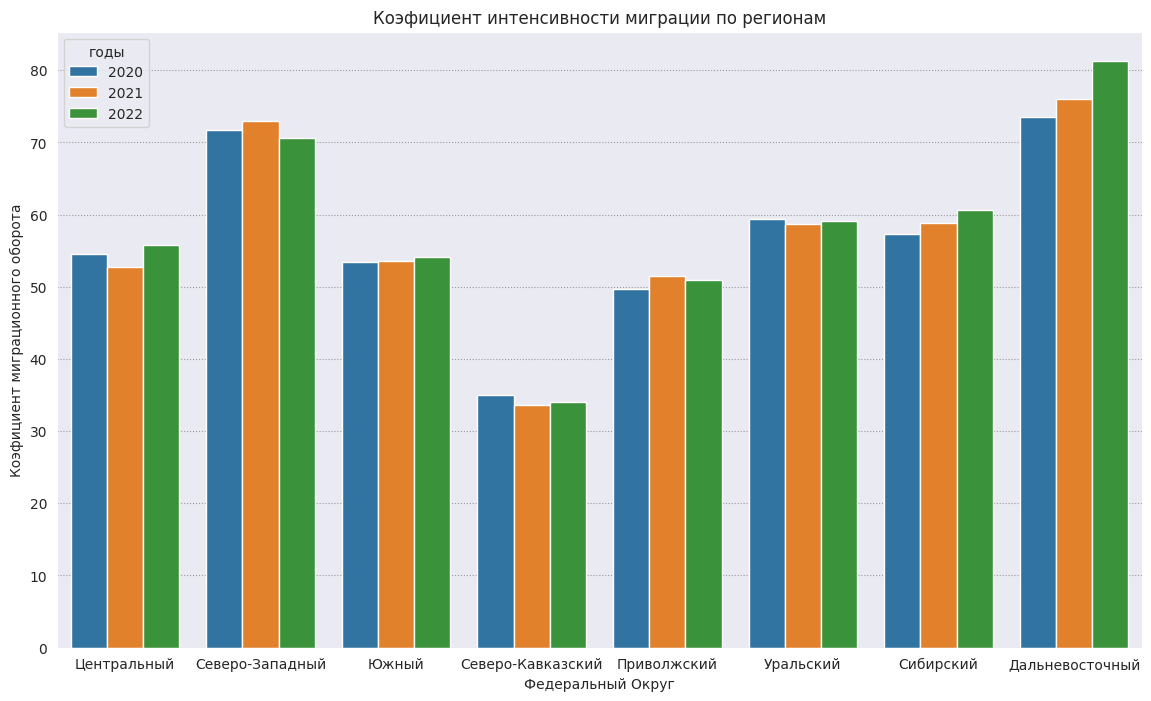

In [ ]:
target_col = 'Коэфициент миграционного оборота'
years = [2020,2021,2022]

source = data[[reg in CFG.FEDERAL for reg in data['Регион']]][[f'{target_col}/{i}' for i in years]]
source.columns = years
source['Федеральный Округ'] = CFG.S_FEDERAL
source = pd.melt(source,id_vars=['Федеральный Округ'],value_vars=years,var_name='годы',value_name=target_col)

sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
plt.figure(figsize=(14,8))
sns.barplot(source,x='Федеральный Округ',y=target_col,hue='годы')
plt.title('Коэфициент интенсивности миграции по регионам')

Text(0.5, 1.0, 'Коэфициент эффективности миграции по регионам')

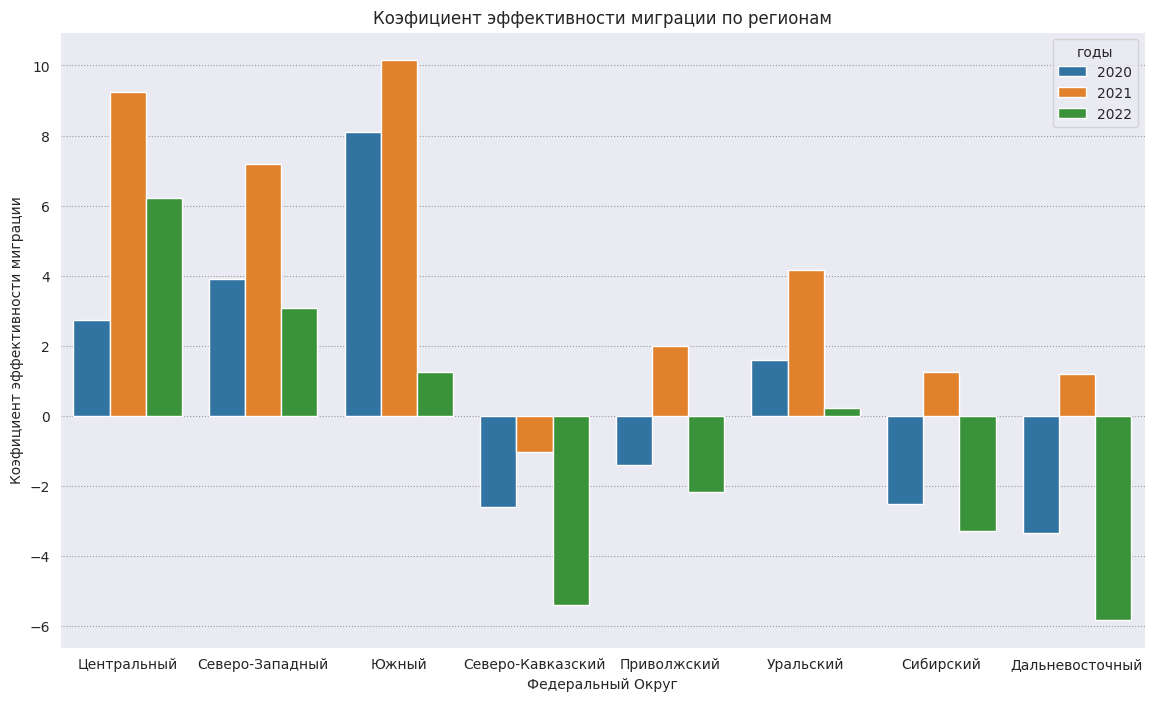

In [ ]:
target_col = 'Коэфициент эффективности миграции'
years = [2020,2021,2022]

source = data[[reg in CFG.FEDERAL for reg in data['Регион']]][[f'{target_col}/{i}' for i in years]]
source.columns = years
source['Федеральный Округ'] = CFG.S_FEDERAL
source = pd.melt(source,id_vars=['Федеральный Округ'],value_vars=years,var_name='годы',value_name=target_col)

sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
plt.figure(figsize=(14,8))
sns.barplot(source,x='Федеральный Округ',y=target_col,hue='годы')
plt.title('Коэфициент эффективности миграции по регионам')

Text(0.5, 1.0, 'Распределение Безработность от целевой переменной')

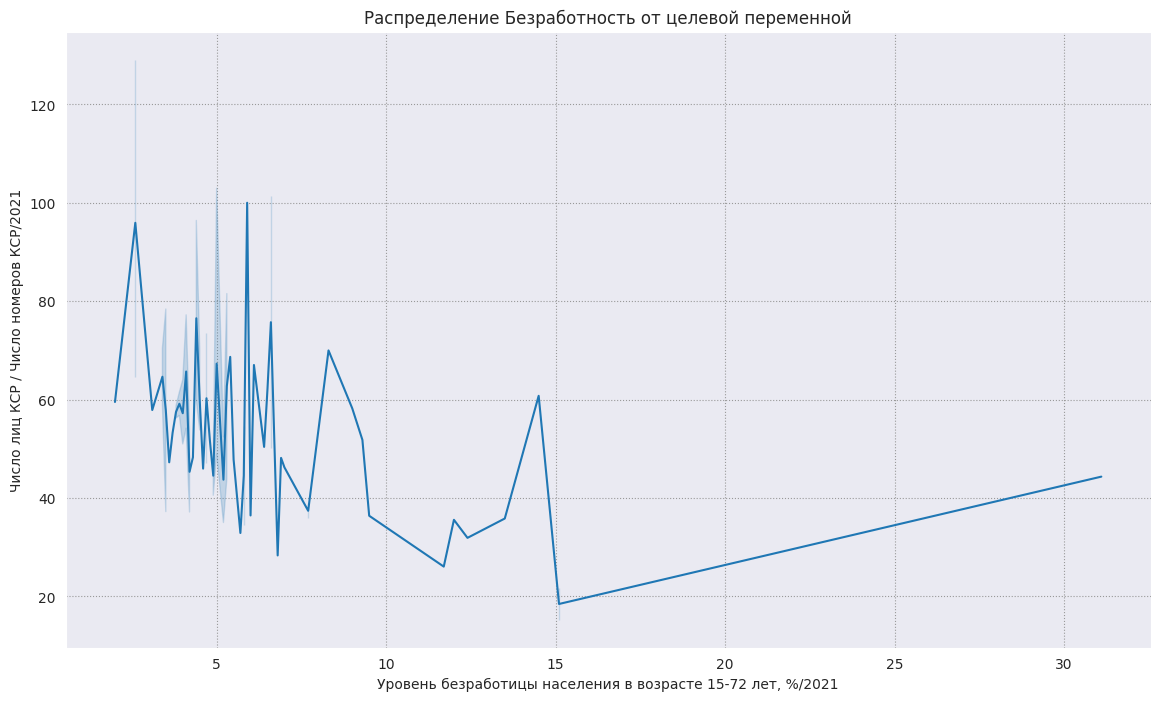

In [ ]:
years = [2021]
target_cols = ['Число лиц КСР / Число номеров КСР','Уровень безработицы населения в возрасте 15-72 лет, %']

source = data[[reg not in CFG.DROP_REGS for reg in data['Регион']]][[f'{target_cols[0]}/{i}' for i in years]+[f'{target_cols[1]}/{i}' for i in years]]

sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
plt.figure(figsize=(14,8))
sns.lineplot(source,y=f'{target_cols[0]}/{years[0]}',x=f'{target_cols[1]}/{years[0]}')
plt.title('Распределение Безработность от целевой переменной')

Text(0.5, 1.0, 'Распределение Объем транспортных услуг от целевой переменной')

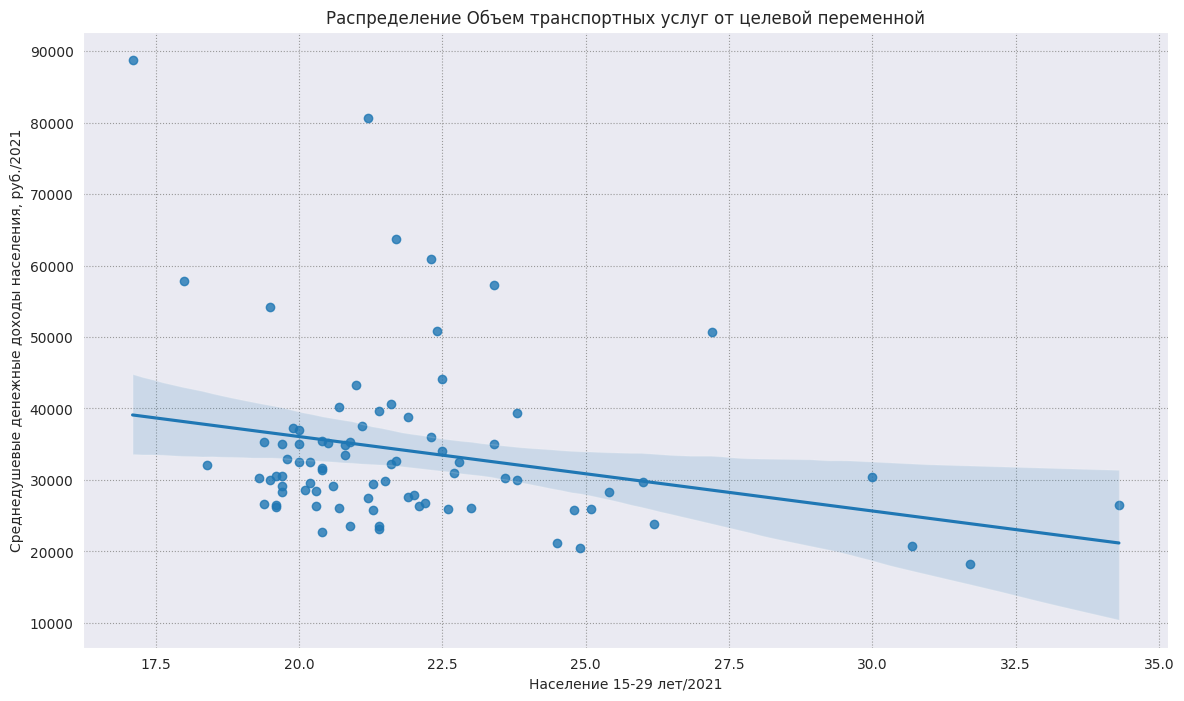

In [ ]:
years = [2021]
target_cols = ['Среднедушевые денежные доходы населения, руб.',
               'Население 15-29 лет']

source = data[[reg not in CFG.DROP_REGS for reg in data['Регион']]][[f'{target_cols[0]}/{i}' for i in years]+[f'{target_cols[1]}/{i}' for i in years]]
source[f'{target_cols[0]}/{years[0]}'] = source[f'{target_cols[0]}/{years[0]}'].astype(float)
source[f'{target_cols[1]}/{years[0]}'] = source[f'{target_cols[1]}/{years[0]}'].astype(float)


sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
plt.figure(figsize=(14,8))
sns.regplot(source,y=f'{target_cols[0]}/{years[0]}',x=f'{target_cols[1]}/{years[0]}')
plt.title('Распределение Объем транспортных услуг от целевой переменной')

Text(0.5, 1.0, 'Распределение Оборот розничной торговли от целевой переменной')

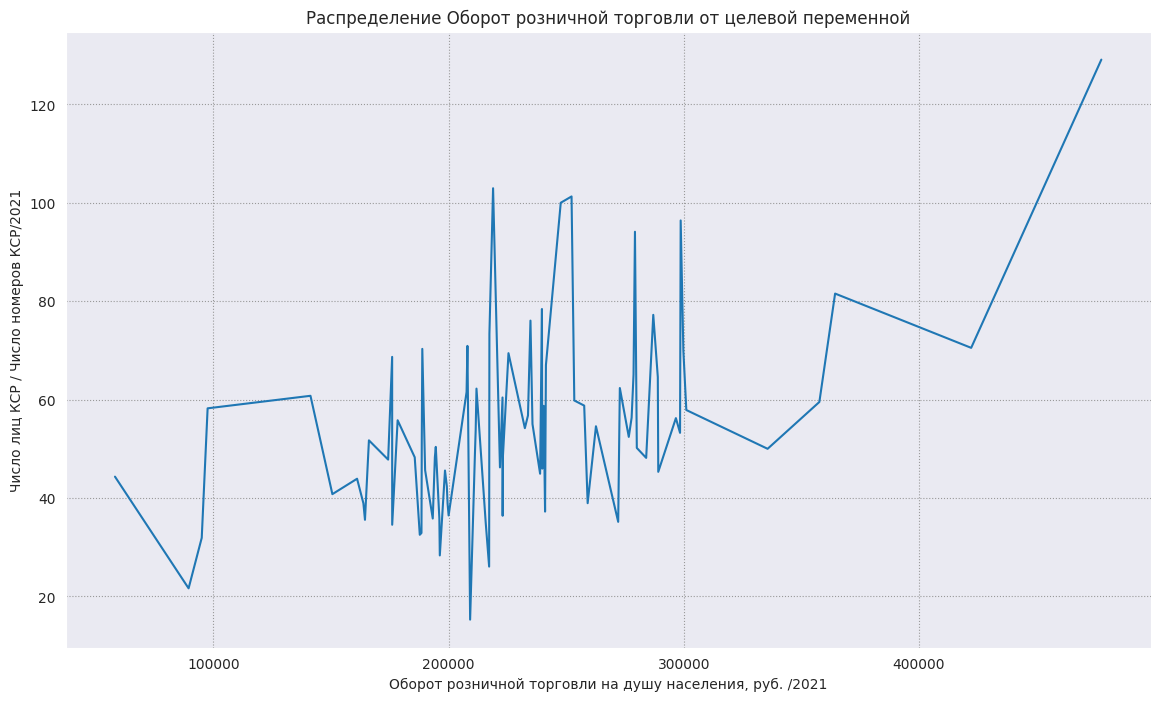

In [ ]:
years = [2021]
target_cols = ['Число лиц КСР / Число номеров КСР','Оборот розничной торговли на душу населения, руб. ']

source = data[[reg not in CFG.DROP_REGS for reg in data['Регион']]][[f'{target_cols[0]}/{i}' for i in years]+[f'{target_cols[1]}/{i}' for i in years]]

sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
plt.figure(figsize=(14,8))
sns.lineplot(source,y=f'{target_cols[0]}/{years[0]}',x=f'{target_cols[1]}/{years[0]}')
plt.title('Распределение Оборот розничной торговли от целевой переменной')